In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)


In [2]:
import pandas as pd
from src.models.category_classifier import train_category_classifier

df = pd.read_csv("../data/processed/tickets_cleaned.csv")
df.head()


,ticket_id,subject,description,channel,category,priority,created_at,customer_plan,sla_breached,escalated,combined_text,clean_text,clean_text_length
0,1,Unable to login with my account,Unable to login with my account. This issue is...,web,Login,Medium,2026-01-30 03:53:16,Pro,0,0,Unable to login with my account Unable to logi...,unable to login with my account unable to logi...,29
1,2,Password reset link not working,Password reset link not working. This issue is...,web,Login,Medium,2026-01-08 17:53:16,Enterprise,0,0,Password reset link not working Password reset...,password reset link not working password reset...,27
2,3,Unable to login with my account,Unable to login with my account. This issue is...,email,Login,High,2026-02-04 04:53:16,Free,0,0,Unable to login with my account Unable to logi...,unable to login with my account unable to logi...,29
3,4,Password reset link not working,Password reset link not working. This issue is...,web,Login,Medium,2026-01-14 14:53:16,Free,0,0,Password reset link not working Password reset...,password reset link not working password reset...,27
4,5,Account locked after multiple attempts,Account locked after multiple attempts. This i...,chat,Login,Medium,2026-01-29 10:53:16,Enterprise,0,0,Account locked after multiple attempts Account...,account locked after multiple attempts account...,27


In [3]:
model = train_category_classifier(df)


 Classification Report:
                 precision    recall  f1-score   support

        Account       1.00      1.00      1.00        40
        Billing       1.00      1.00      1.00        40
            Bug       1.00      1.00      1.00        40
Feature Request       1.00      1.00      1.00        40
          Login       1.00      1.00      1.00        40

       accuracy                           1.00       200
      macro avg       1.00      1.00      1.00       200
   weighted avg       1.00      1.00      1.00       200



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df["clean_text"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ("clf", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

        Account       1.00      1.00      1.00        40
        Billing       1.00      1.00      1.00        40
            Bug       1.00      1.00      1.00        40
Feature Request       1.00      1.00      1.00        40
          Login       1.00      1.00      1.00        40

       accuracy                           1.00       200
      macro avg       1.00      1.00      1.00       200
   weighted avg       1.00      1.00      1.00       200



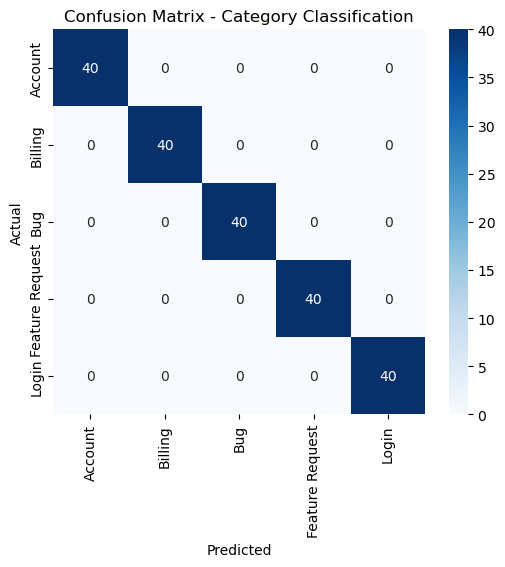

In [5]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, 
            annot=True, 
            fmt="d", 
            cmap="Blues",
            xticklabels=pipeline.classes_,
            yticklabels=pipeline.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Category Classification")
plt.show()


In [7]:
import joblib

joblib.dump(model, "../models/category_model.pkl")

['../models/category_model.pkl']